In [1]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load the reviews file
df = pd.read_csv("reviews.csv")

# Drop unnecessary column
df.drop(columns=["Who Was Your Company During Your Visit"], inplace=True)

# Add location column
df["Location"] = "Hyderabad"

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Get VADER compound sentiment score
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(str(text))
    return sentiment_score['compound']

# Apply sentiment analysis
df['sentiment_score'] = df['A Detailed Review of the Place'].apply(get_sentiment)

# Classify sentiment
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Define aspect keywords
aspect_keywords = {
    'food': ['food', 'meal', 'taste', 'cuisine', 'dish', 'snack'],
    'service': ['service', 'staff', 'waiter', 'reception', 'attendant', 'employee'],
    'cleanliness': ['clean', 'hygiene', 'tidy', 'neat', 'sanitary'],
    'attractions': ['attraction', 'place', 'site', 'monument', 'view', 'spot'],
    'amenities': ['facility', 'amenity', 'pool', 'gym', 'wifi', 'spa', 'internet']
}

# Aspect-based sentiment function using TextBlob
def extract_aspect_sentiment_textblob(text, keywords):
    text_lower = str(text).lower()
    for keyword in keywords:
        if keyword in text_lower:
            return TextBlob(text).sentiment.polarity
    return 0.0

# Apply aspect sentiment
for aspect, keywords in aspect_keywords.items():
    df[f'{aspect}_sentiment'] = df['A Detailed Review of the Place'].apply(
        lambda x: extract_aspect_sentiment_textblob(x, keywords)
    )

# Function to fix date formatting
def format_date(date_str):
    try:
        if isinstance(date_str, str) and ' ' in date_str:
            month, year = date_str.split()
            if len(year) == 4:
                year = year[-2:]
            return f'{month}-{year}'
        return date_str
    except:
        return np.nan

# Format and convert date
df['Date'] = df['Date'].apply(format_date)
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')
df['Date'] = df['Date'].dt.to_period('M')
df['Date'] = df['Date'].dt.to_timestamp()

# Define aspect columns
aspect_columns = ['food_sentiment', 'service_sentiment', 'cleanliness_sentiment', 'attractions_sentiment', 'amenities_sentiment']

# Re-calculate overall sentiment from aspect scores
def overall_sentiment(row):
    avg_sentiment = np.mean([row[aspect] for aspect in aspect_columns])
    if avg_sentiment > 0.1:
        return 'Positive'
    elif avg_sentiment < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df.apply(overall_sentiment, axis=1)

# Clean newline characters in review text
df['A Detailed Review of the Place'] = df['A Detailed Review of the Place'].str.replace('\n', ' ', regex=True)

# Save final output
import csv
df.to_csv("reviews_with_sentiment_clean.csv", index=False, encoding='utf-8', sep=',', quoting=csv.QUOTE_ALL)


In [2]:
df.isnull().sum()

Name                                0
Date                                0
Place You Want to Review About      0
On a Scale of 1-5 Rate the Place    0
A Detailed Review of the Place      0
Location                            0
sentiment_score                     0
sentiment                           0
food_sentiment                      0
service_sentiment                   0
cleanliness_sentiment               0
attractions_sentiment               0
amenities_sentiment                 0
dtype: int64

C:\Users\sivam\AppData\Local\Temp\ipykernel_25368\723930128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='pastel')


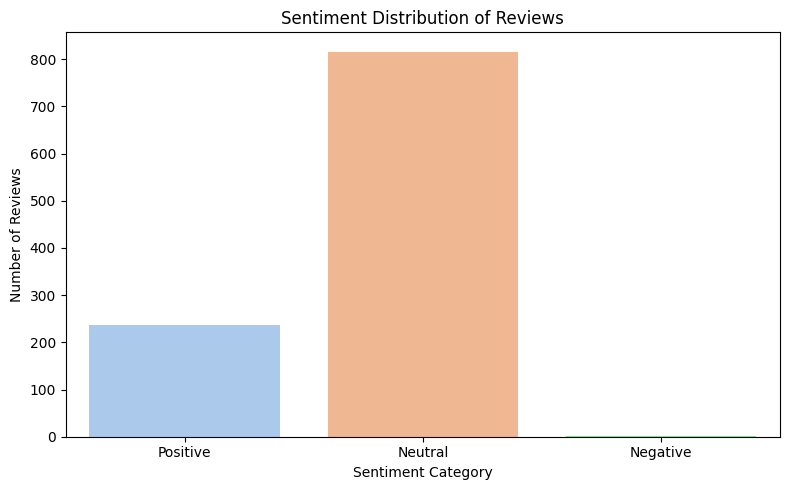

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='pastel')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

- This chart groups tourist reviews of places in Hyderabad into three categories:

Positive: People had a pleasant experience.

Neutral: Experience was okay or mixed.

Negative: Tourists had a poor experience.

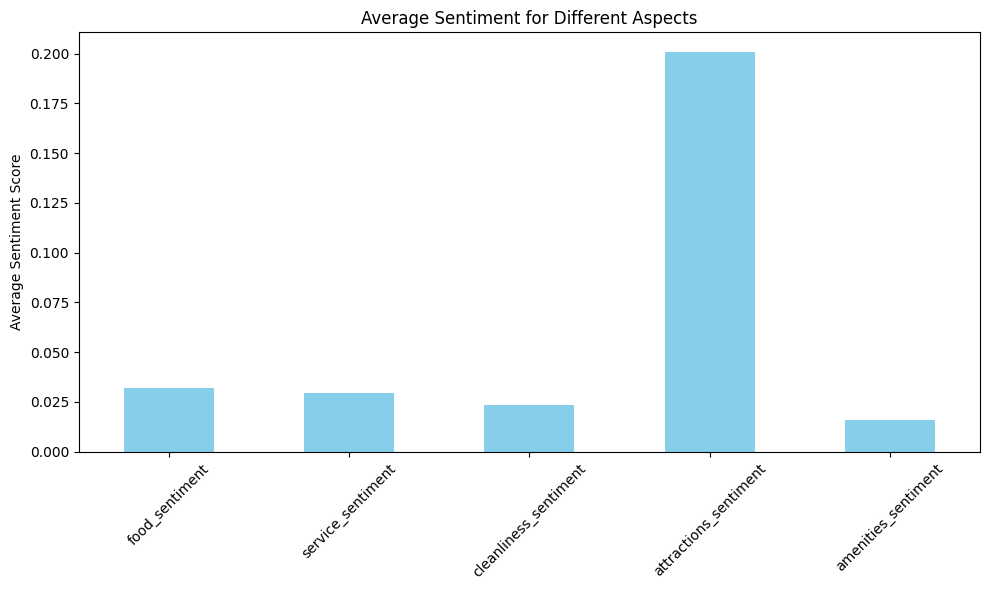

In [6]:
# Plotting average sentiment for aspects
plt.figure(figsize=(10, 6))
aspect_sentiment_data = df[aspect_columns].mean()
aspect_sentiment_data.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment for Different Aspects')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What this plot shows:

This bar chart compares how tourists feel about different parts of their Hyderabad visit:

🍲 Food – Did people enjoy local dishes like biryani, street food, etc.?

💁‍♂️ Service – Were staff and hospitality experiences good?

🧼 Cleanliness – Were public areas, monuments, and places well-maintained?

🗺️ Attractions – How did people feel about landmarks like Charminar, Golconda Fort, etc.?

🏨 Amenities – Things like parking, restrooms, Wi-Fi, accessibility, etc.

📈 Why it's useful:

It helps stakeholders like tour operators, tourism boards, and city planners see:

What Hyderabad is doing great at ✅

What needs improvement ❗ (e.g., if "cleanliness" has low sentiment)

In [7]:
df.dtypes

Name                                        object
Date                                datetime64[ns]
Place You Want to Review About              object
On a Scale of 1-5 Rate the Place           float64
A Detailed Review of the Place              object
Location                                    object
sentiment_score                            float64
sentiment                                   object
food_sentiment                             float64
service_sentiment                          float64
cleanliness_sentiment                      float64
attractions_sentiment                      float64
amenities_sentiment                        float64
dtype: object

In [8]:
df

,Name,Date,Place You Want to Review About,On a Scale of 1-5 Rate the Place,A Detailed Review of the Place,Location,sentiment_score,sentiment,food_sentiment,service_sentiment,cleanliness_sentiment,attractions_sentiment,amenities_sentiment
0,Sharat Chandra K,2023-08-01,Charminar,5.0,Charminar is greatest place in Hyderabad wow n...,Hyderabad,0.9882,Positive,0.0,0.0,0.0,0.573333,0.0
1,Relax57826951763,2023-07-01,Charminar,5.0,Gumne ke liya best place h yee jaane jesa he m...,Hyderabad,0.6369,Positive,0.0,0.0,0.0,1.000000,0.0
2,EASWAR52,2023-06-01,Charminar,3.0,Historical CHARMINAR is the centre of attracti...,Hyderabad,0.5118,Neutral,0.0,0.0,0.0,0.020833,0.0
3,Mr. Himanshu Sinha,2023-01-01,Charminar,5.0,Charminar is now getting too much filled with ...,Hyderabad,0.5478,Neutral,0.0,0.0,0.0,0.196484,0.0
4,fudxplorer,2022-12-01,Charminar,5.0,A fantastic structure. Ab it crowded as we wen...,Hyderabad,0.6597,Neutral,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,pvrkaushik,2018-06-01,NTR Garden,4.0,Dense Green park in the heart of the city... C...,Hyderabad,0.9246,Neutral,0.0,0.0,0.0,0.300000,0.0
1051,S R V,2019-03-01,NTR Garden,4.0,NTR gardens near Hussain Sagar Lake is a garde...,Hyderabad,0.8625,Neutral,0.0,0.0,0.0,0.175000,0.0
1052,Dr Manoj Swaminathan,2019-03-01,NTR Garden,5.0,"Kids will simply enjoy the various rides, whic...",Hyderabad,0.8481,Neutral,0.0,0.0,0.0,0.000000,0.0
1053,Mukta2016,2019-01-01,NTR Garden,4.0,The NT Ramarao garden in Hyderabad is a nice g...,Hyderabad,0.8360,Positive,0.0,0.0,0.0,0.608333,0.0
